In [1]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 4.8 MB/s 


In [4]:
df=pd.read_csv('insurance.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


나이,성별,bmi,아이,흡연,지역에 따라서 보험료가 얼마나 바뀌는지에 대하여 분석을 할것이다.

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

결측치 없음


In [8]:
target='charges'
features=['age','sex','bmi','children','smoker','region']

In [9]:
df[target].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

target에 관하여 통계량 분석 결과 평균 13270정도가 나옴


target 은 보험료이므로 classification 보다는 regression 이 적합함

일반적인 상식으로는 나이가 올라갈수록 bmi가 높을수록 아이가 많을수록 담배를 필수록 보험료가 올라갈것이라고 예측할 수 있고 
지역은 큰 상관이 없을 것 같다.
또한 남녀의 평균 수명이 여자가 조금 더 높으므로 보험료는 남자가 조금 더 비싸지 않을까 라는 가설을 세울수 있다.

In [10]:
df[features].describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


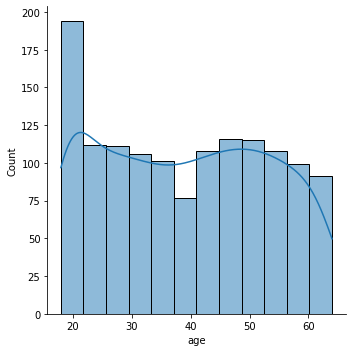

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df['age'],kde=True);


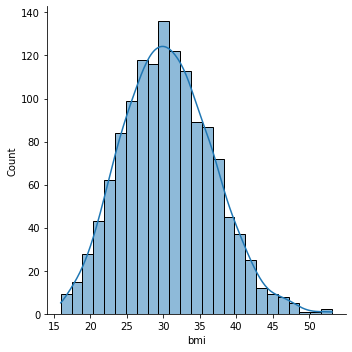

In [12]:
sns.displot(df['bmi'],kde=True);


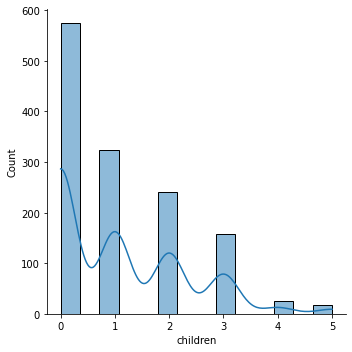

In [13]:
sns.displot(df['children'],kde=True);


수치형 컬럼에 대하여 분포를 그림으로 나타내보았다.

In [14]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

성별은 거의 1대1로 잘 맞추어져있기에 굳이 전처리가 필요해보이지는 않는다.

In [15]:
df=df[df['bmi']<45]

bmi 45이상은 너무 과도한 비만이라 제외

In [16]:
df.describe()

,age,bmi,children,charges
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,39.203338,30.407143,1.089530,13205.513244
std,14.075226,5.769454,1.205352,11974.486056
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.205000,0.000000,4740.287150
50%,39.000000,30.210000,1.000000,9369.615750
75%,51.000000,34.400000,2.000000,16639.912515
max,64.000000,44.880000,5.000000,62592.873090


In [17]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

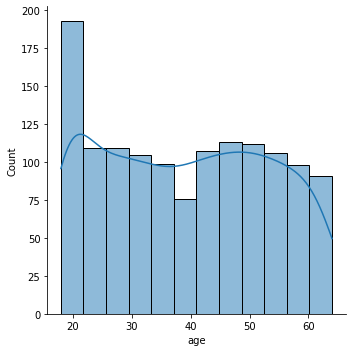

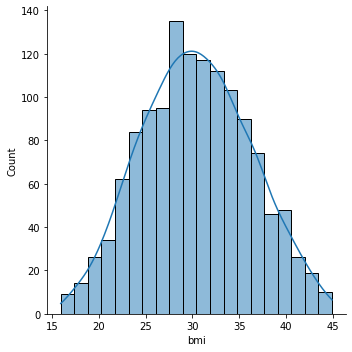

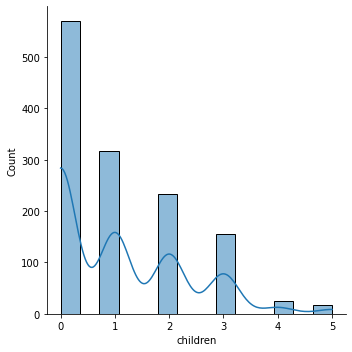

In [18]:
sns.displot(df['age'],kde=True);
sns.displot(df['bmi'],kde=True);
sns.displot(df['children'],kde=True);

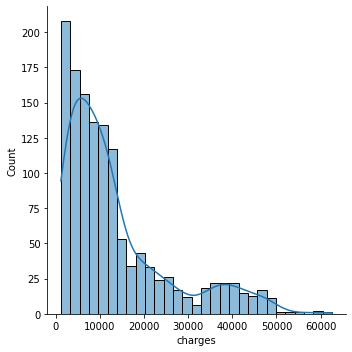

In [19]:
sns.displot(df[target],kde=True);


In [20]:
df[target] = df[df[target] < np.percentile(df[target], 99)][target]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


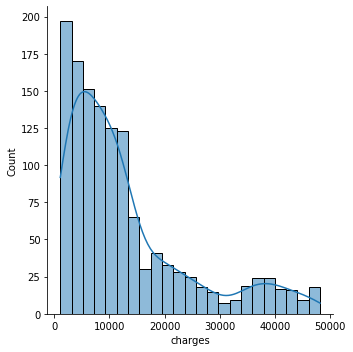

In [21]:
sns.displot(df[target],kde=True);

In [22]:

df['transformed']=np.log1p(df[target])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


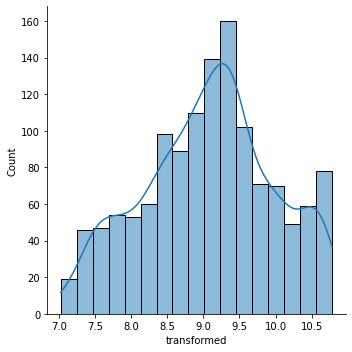

In [23]:
sns.displot(df['transformed'],kde=True);

보험료가 너무 비싼 이상치를 제외하고 편향된 분포를 수정하기 위하여 로그를 취하였다.

In [24]:
df.isnull().sum()

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges        14
transformed    14
dtype: int64

In [25]:
df=df.dropna(axis=0)

In [26]:
df.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
transformed    0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.25, random_state=42)

In [28]:
X_train=train[features]
X_test=test[features]
y_train=train[target]
y_test=test[target]

In [30]:
def calculate_baseline_error(data):
    baseline_error = 0

    major = data.mean()
    y_base = [major] * len(data)
    errors = y_base - data
    baseline_error = errors.abs().mean()

    return baseline_error

In [31]:
calculate_baseline_error(y_test)


8842.95331163386

In [32]:
calculate_baseline_error(y_train)

8417.869274824929

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report


from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    RandomForestRegressor(random_state=2)
)

pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.8244481897542777

In [46]:
from sklearn.metrics import mean_absolute_error
y_pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

mae:  2482.9221295097245


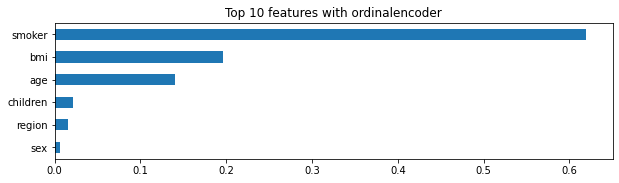

In [52]:
import matplotlib.pyplot as plt


rf = pipe.named_steps['randomforestregressor']
colnames = pipe.named_steps['ordinalencoder'].get_feature_names()
importances = pd.Series(rf.feature_importances_, colnames)

n = 10
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with ordinalencoder')
importances.sort_values()[-n:].plot.barh();



In [56]:
from sklearn.compose import TransformedTargetRegressor
newpipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    RandomForestRegressor(random_state=2)
)

tt = TransformedTargetRegressor(regressor=newpipe,
                                func=np.log1p, inverse_func=np.expm1)

tt.fit(X_train, y_train)
tt.score(X_test, y_test)

0.8335318550377907

In [61]:
features=['smoker','bmi','age','children']
X_train=train[features]
X_test=test[features]
y_train=train[target]
y_test=test[target]

In [63]:
from sklearn.compose import TransformedTargetRegressor
newpipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    RandomForestRegressor(random_state=2)
)

tt = TransformedTargetRegressor(regressor=newpipe,
                                func=np.log1p, inverse_func=np.expm1)

tt.fit(X_train, y_train)
tt.score(X_test, y_test)

0.8312130268427891

In [77]:
target='charges'
features=['age','sex','bmi','children','smoker','region']
X_train=train[features]
X_test=test[features]
y_train=train[target]
y_test=test[target]

In [78]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    RandomForestRegressor(random_state=2)
)

pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.8244481897542777

In [79]:
from category_encoders import TargetEncoder

from sklearn.model_selection import cross_val_score
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(max_depth = 10, n_jobs=-1, random_state=2)
)

k = 3

scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [2783.94324093 2429.90328133 2692.84340011]


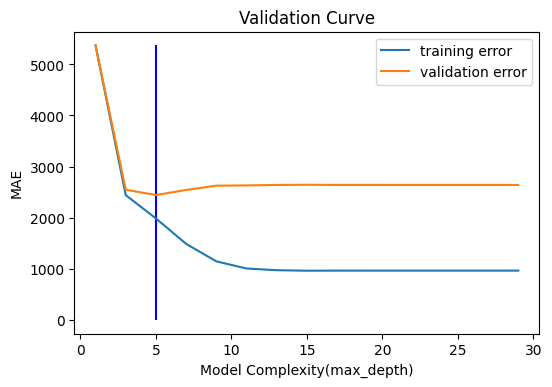

In [80]:
from sklearn.model_selection import validation_curve
depth = range(1, 30, 2)
ts, vs = validation_curve(
    pipe, X_train, y_train
    , param_name='randomforestregressor__max_depth'
    , param_range=depth, scoring='neg_mean_absolute_error'
    , cv=3
    , n_jobs=-1
)

train_scores_mean = np.mean(-ts, axis=1)
validation_scores_mean = np.mean(-vs, axis=1)

fig, ax = plt.subplots()

# 훈련세트 검증곡선
ax.plot(depth, train_scores_mean, label='training error')

# 검증세트 검증곡선
ax.plot(depth, validation_scores_mean, label='validation error')

# 이상적인 max_depth
ax.vlines(5,0, train_scores_mean.max(), color='blue')

# 그래프 셋팅
ax.set(title='Validation Curve'
      , xlabel='Model Complexity(max_depth)', ylabel='MAE')
ax.legend()
fig.dpi = 100

In [81]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(max_depth = 5, n_jobs=-1, random_state=2)
)

k = 3

scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [2529.88678255 2275.89409047 2521.53549636]


In [82]:
from scipy.stats import randint, uniform

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=2)
)

dists = {    
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) 
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [83]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 0.930132925723123, 'randomforestregressor__n_estimators': 315, 'simpleimputer__strategy': 'mean'}
MAE:  2417.3563647591377


In [84]:
pipe = clf.best_estimator_

In [85]:

y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트세트 MAE: ${mae:,.0f}')

테스트세트 MAE: $2,458


In [109]:
y_pred = pipe.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'트레이닝세트 MAE: ${mae:,.0f}')

트레이닝세트 MAE: $2,082


In [86]:
pipe.score(X_test,y_test)

0.8356102452945233

In [90]:
pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 251 kB/s 
     |████████████████████████████████| 13.1 MB 50.1 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=42ca8eac77ef20c7794a3e6fd9c4dbabdb132ec94bbdaafceca22843672edddd
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [91]:
from pdpbox.pdp import pdp_isolate, pdp_plot
isolated = pdp_isolate(
    model=pipe, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=features[0]
)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fcb3565ccd0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fcb355fa810>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


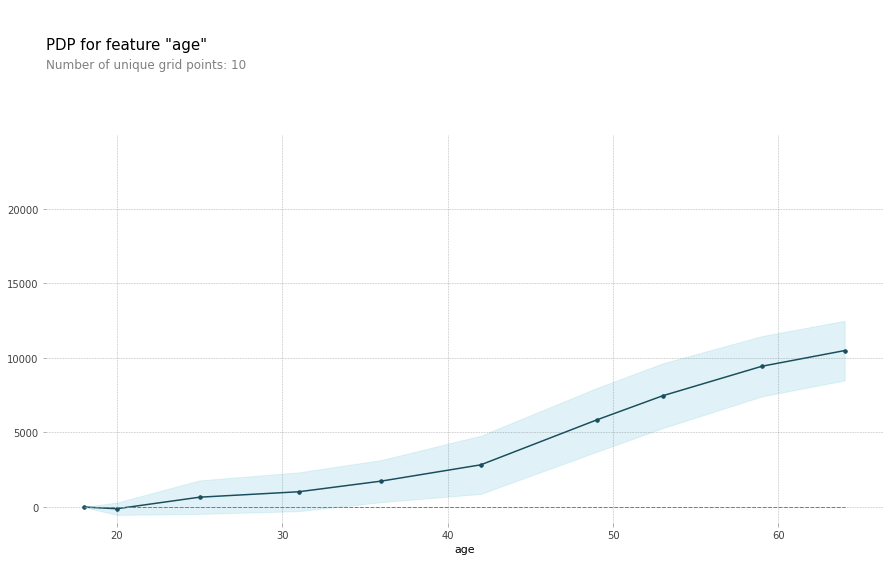

In [94]:
pdp_plot(isolated, feature_name=features[0])

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fcb3544fad0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fcb3557fb10>})

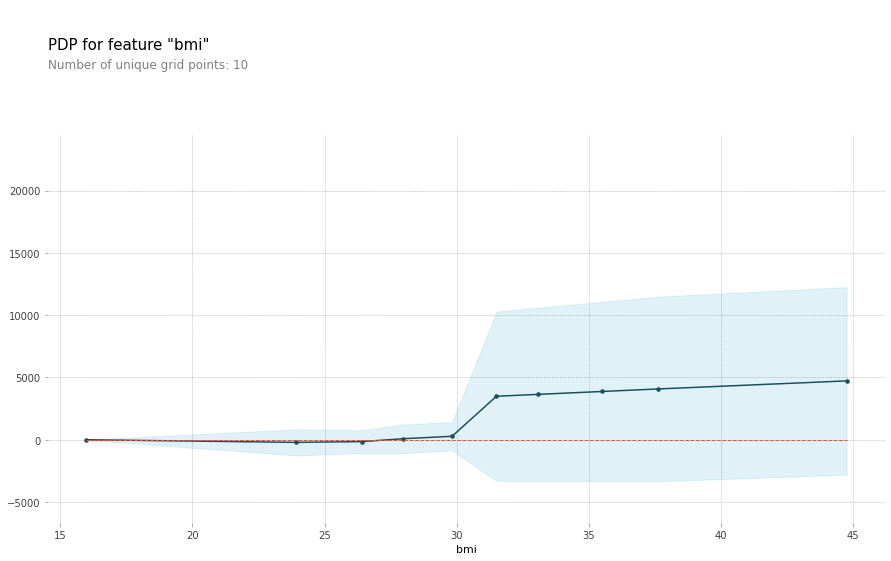

In [97]:
isolated = pdp_isolate(
    model=pipe, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=features[2]
)
pdp_plot(isolated, feature_name=features[2])

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fcb353876d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fcb3533ba50>})

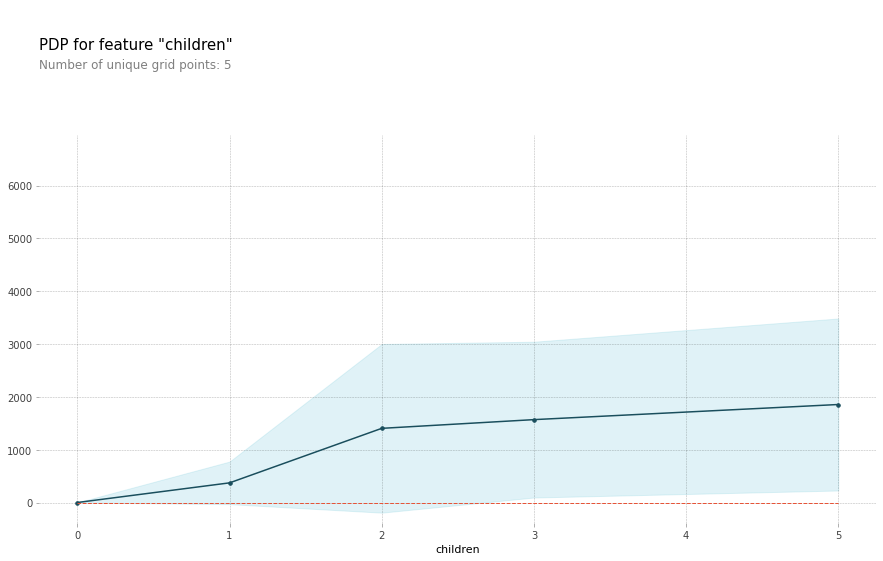

In [98]:
isolated = pdp_isolate(
    model=pipe, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=features[3]
)
pdp_plot(isolated, feature_name=features[3])

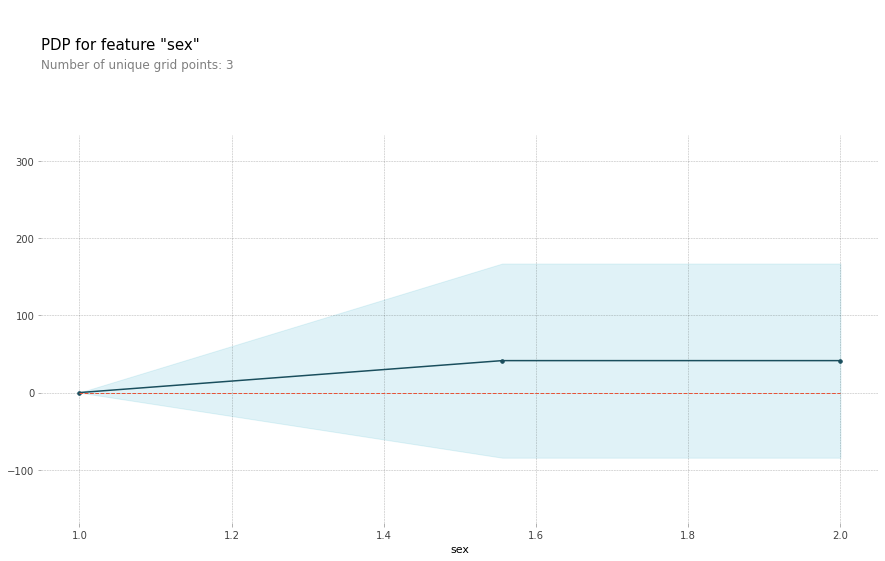

In [104]:
from pdpbox import pdp
encoder = pipe.named_steps['ordinalencoder']
X_encoded = encoder.fit_transform(X_test)
rf = pipe.named_steps['randomforestregressor']
feature = 'sex'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

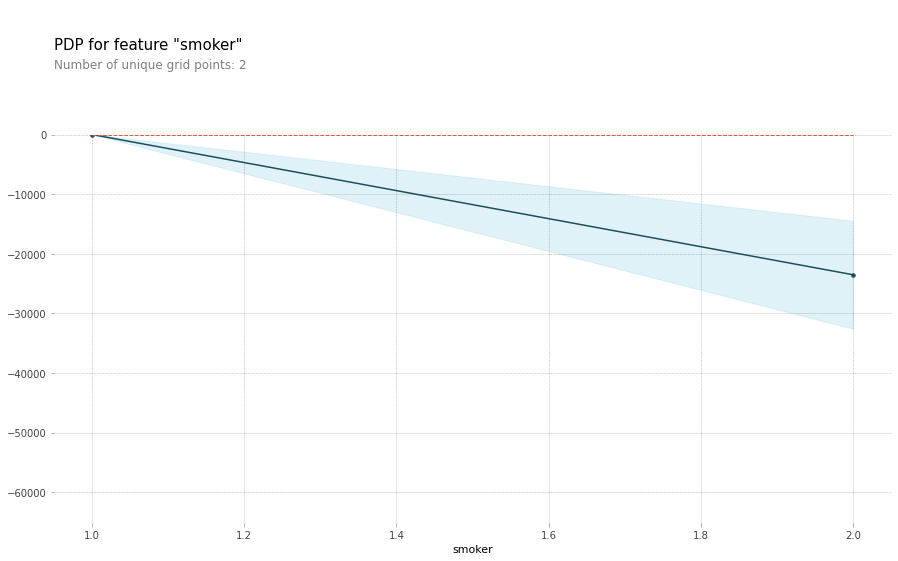

In [107]:
from pdpbox import pdp
encoder = pipe.named_steps['ordinalencoder']
X_encoded = encoder.fit_transform(X_test)
rf = pipe.named_steps['randomforestregressor']
feature = 'smoker'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

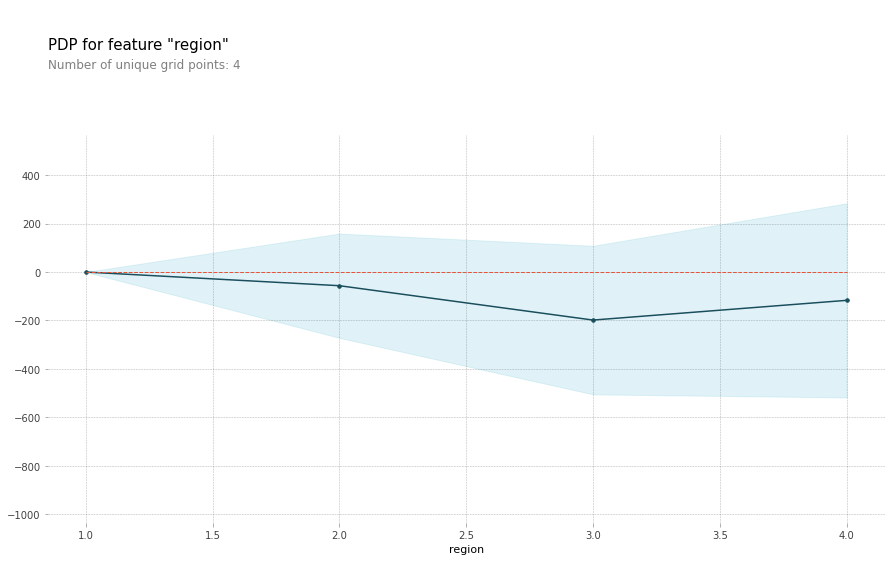

In [105]:
from pdpbox import pdp
encoder = pipe.named_steps['ordinalencoder']
X_encoded = encoder.fit_transform(X_test)
rf = pipe.named_steps['randomforestregressor']
feature = 'region'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [108]:
encoder.mapping


[{'col': 'sex', 'data_type': dtype('O'), 'mapping': male      1
  female    2
  NaN      -2
  dtype: int64}, {'col': 'smoker', 'data_type': dtype('O'), 'mapping': yes    1
  no     2
  NaN   -2
  dtype: int64}, {'col': 'region',
  'data_type': dtype('O'),
  'mapping': southeast    1
  northeast    2
  southwest    3
  northwest    4
  NaN         -2
  dtype: int64}]